This is the another version of already written convolutional neural network but i have made some changes to the layers and the epochs to gain high accuracy


In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "../input/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

../input/train/0/
../input/train/1/
../input/train/2/
../input/train/3/
../input/train/4/
../input/train/5/
../input/train/6/
../input/train/7/
../input/train/8/
../input/train/9/
../input/train/10/
../input/train/11/
../input/train/12/
../input/train/13/
../input/train/14/
../input/train/15/
../input/train/16/
../input/train/17/
../input/train/18/
../input/train/19/
../input/train/20/
../input/train/21/
../input/train/22/
../input/train/23/
../input/train/24/
../input/train/25/
../input/train/26/
../input/train/27/
../input/train/28/
../input/train/29/
../input/train/30/
../input/train/31/
../input/train/32/
../input/train/33/
../input/train/34/
../input/train/35/
../input/train/36/
../input/train/37/
../input/train/38/
../input/train/39/
../input/train/40/
../input/train/41/
../input/train/42/


In [3]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Using TensorFlow backend.


In [4]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/20
31368/31368 [==============================] - 11s 342us/step - loss: 1.4015 - acc: 0.6003 - val_loss: 0.2771 - val_acc: 0.9313
Epoch 2/20
31368/31368 [==============================] - 7s 235us/step - loss: 0.3114 - acc: 0.9003 - val_loss: 0.1003 - val_acc: 0.9740
Epoch 3/20
31368/31368 [==============================] - 7s 236us/step - loss: 0.2012 - acc: 0.9368 - val_loss: 0.0693 - val_acc: 0.9848
Epoch 4/20
31368/31368 [==============================] - 7s 236us/step - loss: 0.1516 - acc: 0.9527 - val_loss: 0.0523 - val_acc: 0.9839
Epoch 5/20
31368/31368 [==============================] - 7s 236us/step - loss: 0.1325 - acc: 0.9582 - val_loss: 0.0429 - val_acc: 0.9879
Epoch 6/20
31368/31368 [==============================] - 7s 236us/step - loss: 0.1078 - acc: 0.9661 - val_loss: 0.0357 - val_acc: 0.9916
Epoch 7/20
31368/31368 [==============================] - 7s 238us/step - loss: 0.0946 - acc: 0.9703 - val_loss: 0.0391 - 

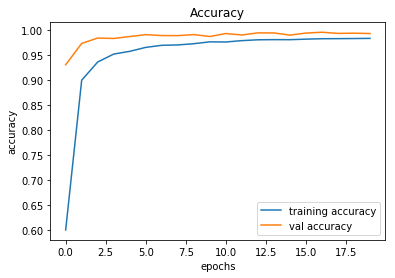

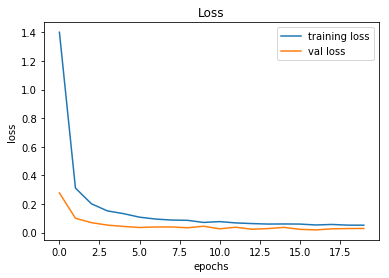

In [5]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [6]:
#Predicting with the test data
y_test=pd.read_csv("../input/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('../input/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.965716547901821